In [1]:
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from pylab import rcParams

from utils import METRICS, CONT_PARAMETERS, LOG_PARAMETERS, SET_PARAMETERS, INT_PARAMETERS, read_files,\
    top_mean_dev_auc, top_min_whole_validation_auc, top_min_dev_auc, read_files

In [2]:
rcParams['figure.figsize'] = 20, 5
pd.set_option('display.max_columns', None)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
files = ['./experiments/overfit-true-10k.pkl',
                           './experiments/overfit-true-10k-2.pkl',
                           './experiments/overfit-true-10k-3.pkl',
                           './experiments/overfit-true-10k-4.pkl',
                           ]

In [5]:
top_k = 1000000

In [6]:
best_mean_dev = top_mean_dev_auc(read_files(files), top_k)
best_mean_dev.groupby(['file', 'experiment_id']).ngroups

337

In [7]:
best_min_dev = top_min_dev_auc(read_files(files), top_k)
best_min_dev.groupby(['file', 'experiment_id']).ngroups

332

In [8]:
true_best = top_min_whole_validation_auc(read_files(files), top_k)
true_best.groupby(['file', 'experiment_id']).ngroups

297

In [9]:
compare_columns = ['mean_dev_auc', 'mean_validation_auc',
               'mean_whole_validation_auc', 'max_overfit_auc',
                   'min_dev_auc', 'min_validation_auc', 'min_whole_validation_auc']

In [10]:
best_mean_dev[compare_columns].describe().T

count      mean       std       min       25%  \
mean_dev_auc               1000000.0  0.831919  0.001144  0.830149  0.830909   
mean_validation_auc        1000000.0  0.807522  0.001832  0.799612  0.806371   
mean_whole_validation_auc  1000000.0  0.807407  0.002108  0.796946  0.806098   
max_overfit_auc            1000000.0  0.026222  0.005893  0.015247  0.021579   
min_dev_auc                1000000.0  0.821056  0.001875  0.813085  0.819677   
min_validation_auc         1000000.0  0.804684  0.002221  0.791286  0.803282   
min_whole_validation_auc   1000000.0  0.807113  0.002201  0.794607  0.805828   

                                50%       75%       max  
mean_dev_auc               0.831800  0.832902  0.834534  
mean_validation_auc        0.807667  0.808820  0.812041  
mean_whole_validation_auc  0.807687  0.809019  0.812101  
max_overfit_auc            0.024496  0.029988  0.053933  
min_dev_auc                0.821040  0.822524  0.826636  
min_validation_auc         0.804746  0.806251  0.811070  
min_whole_validation_auc   0.807414  0.808745  0.811965

In [11]:
best_min_dev[compare_columns].describe().T

count      mean       std       min       25%  \
mean_dev_auc               1000000.0  0.831589  0.001580  0.824328  0.830478   
mean_validation_auc        1000000.0  0.806890  0.002423  0.796574  0.805528   
mean_whole_validation_auc  1000000.0  0.806696  0.002702  0.795279  0.805101   
max_overfit_auc            1000000.0  0.027997  0.007848  0.012947  0.021747   
min_dev_auc                1000000.0  0.821437  0.001443  0.819374  0.820194   
min_validation_auc         1000000.0  0.804033  0.002713  0.792260  0.802299   
min_whole_validation_auc   1000000.0  0.806384  0.002802  0.792685  0.804760   

                                50%       75%       max  
mean_dev_auc               0.831725  0.832888  0.834534  
mean_validation_auc        0.807200  0.808699  0.812041  
mean_whole_validation_auc  0.807097  0.808769  0.812101  
max_overfit_auc            0.025590  0.033522  0.056034  
min_dev_auc                0.821187  0.822532  0.826636  
min_validation_auc         0.804206  0.806022  0.811070  
min_whole_validation_auc   0.806837  0.808519  0.811965

In [12]:
true_best[compare_columns].describe().T

count      mean       std       min       25%  \
mean_dev_auc               1000000.0  0.830050  0.003202  0.803715  0.828817   
mean_validation_auc        1000000.0  0.808243  0.002205  0.782507  0.807554   
mean_whole_validation_auc  1000000.0  0.808949  0.001060  0.807150  0.808073   
max_overfit_auc            1000000.0  0.024273  0.009083  0.011066  0.019840   
min_dev_auc                1000000.0  0.818466  0.004068  0.792139  0.816853   
min_validation_auc         1000000.0  0.805482  0.002897  0.777446  0.804586   
min_whole_validation_auc   1000000.0  0.808714  0.001044  0.807150  0.807829   

                                50%       75%       max  
mean_dev_auc               0.830452  0.832255  0.834534  
mean_validation_auc        0.808556  0.809334  0.812472  
mean_whole_validation_auc  0.808865  0.809593  0.812101  
max_overfit_auc            0.021720  0.024985  0.096972  
min_dev_auc                0.819036  0.820923  0.826636  
min_validation_auc         0.805811  0.806971  0.811070  
min_whole_validation_auc   0.808631  0.809309  0.811965

In [13]:
best = best_mean_dev

In [14]:
best.shape

(1000000, 69)

In [15]:
best.groupby(SET_PARAMETERS + ['file', 'experiment_id']).size().groupby(SET_PARAMETERS).size()

param_is_unbalance  param_boost_from_average
False               False                       82
                    True                        81
True                False                       89
                    True                        85
dtype: int64

In [16]:
best['param_bagging_enable'] = (best.param_bagging_freq != 0)
best.groupby('param_bagging_enable').size()

param_bagging_enable
False    383618
True     616382
dtype: int64

In [17]:
best['param_feature_fraction_enable'] = (best.param_feature_fraction != 1)
best.groupby('param_feature_fraction_enable').size()

param_feature_fraction_enable
False    339749
True     660251
dtype: int64

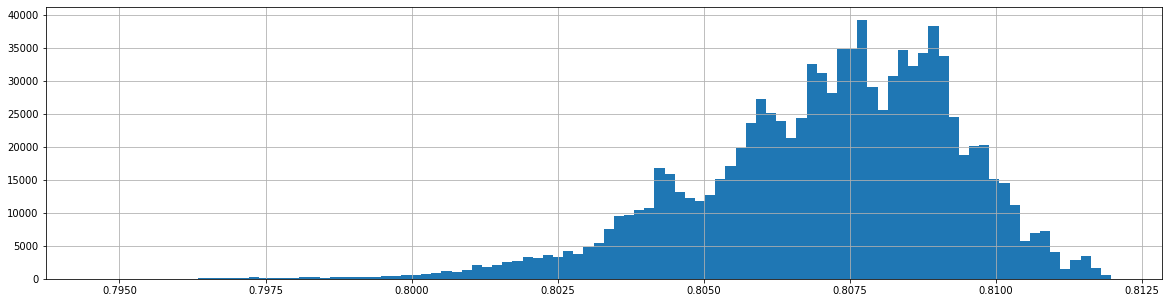

In [18]:
best.min_whole_validation_auc.hist(bins=100);

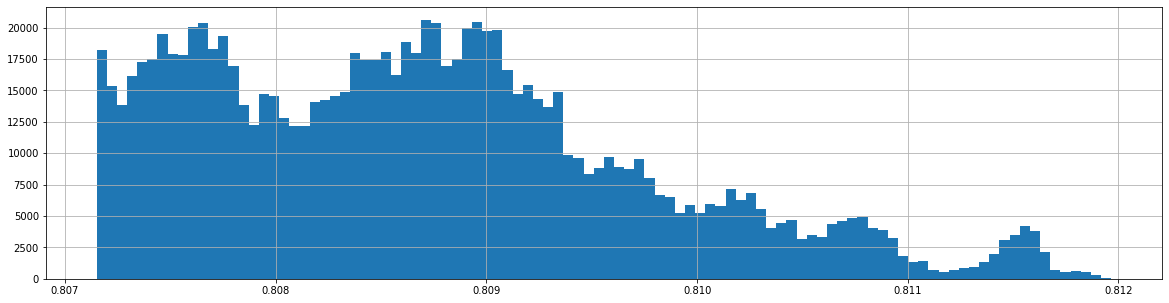

In [19]:
true_best.min_whole_validation_auc.hist(bins=100);

In [20]:
best_iteration = best.sort_values('mean_dev_auc').groupby(['file', 'experiment_id']).last()

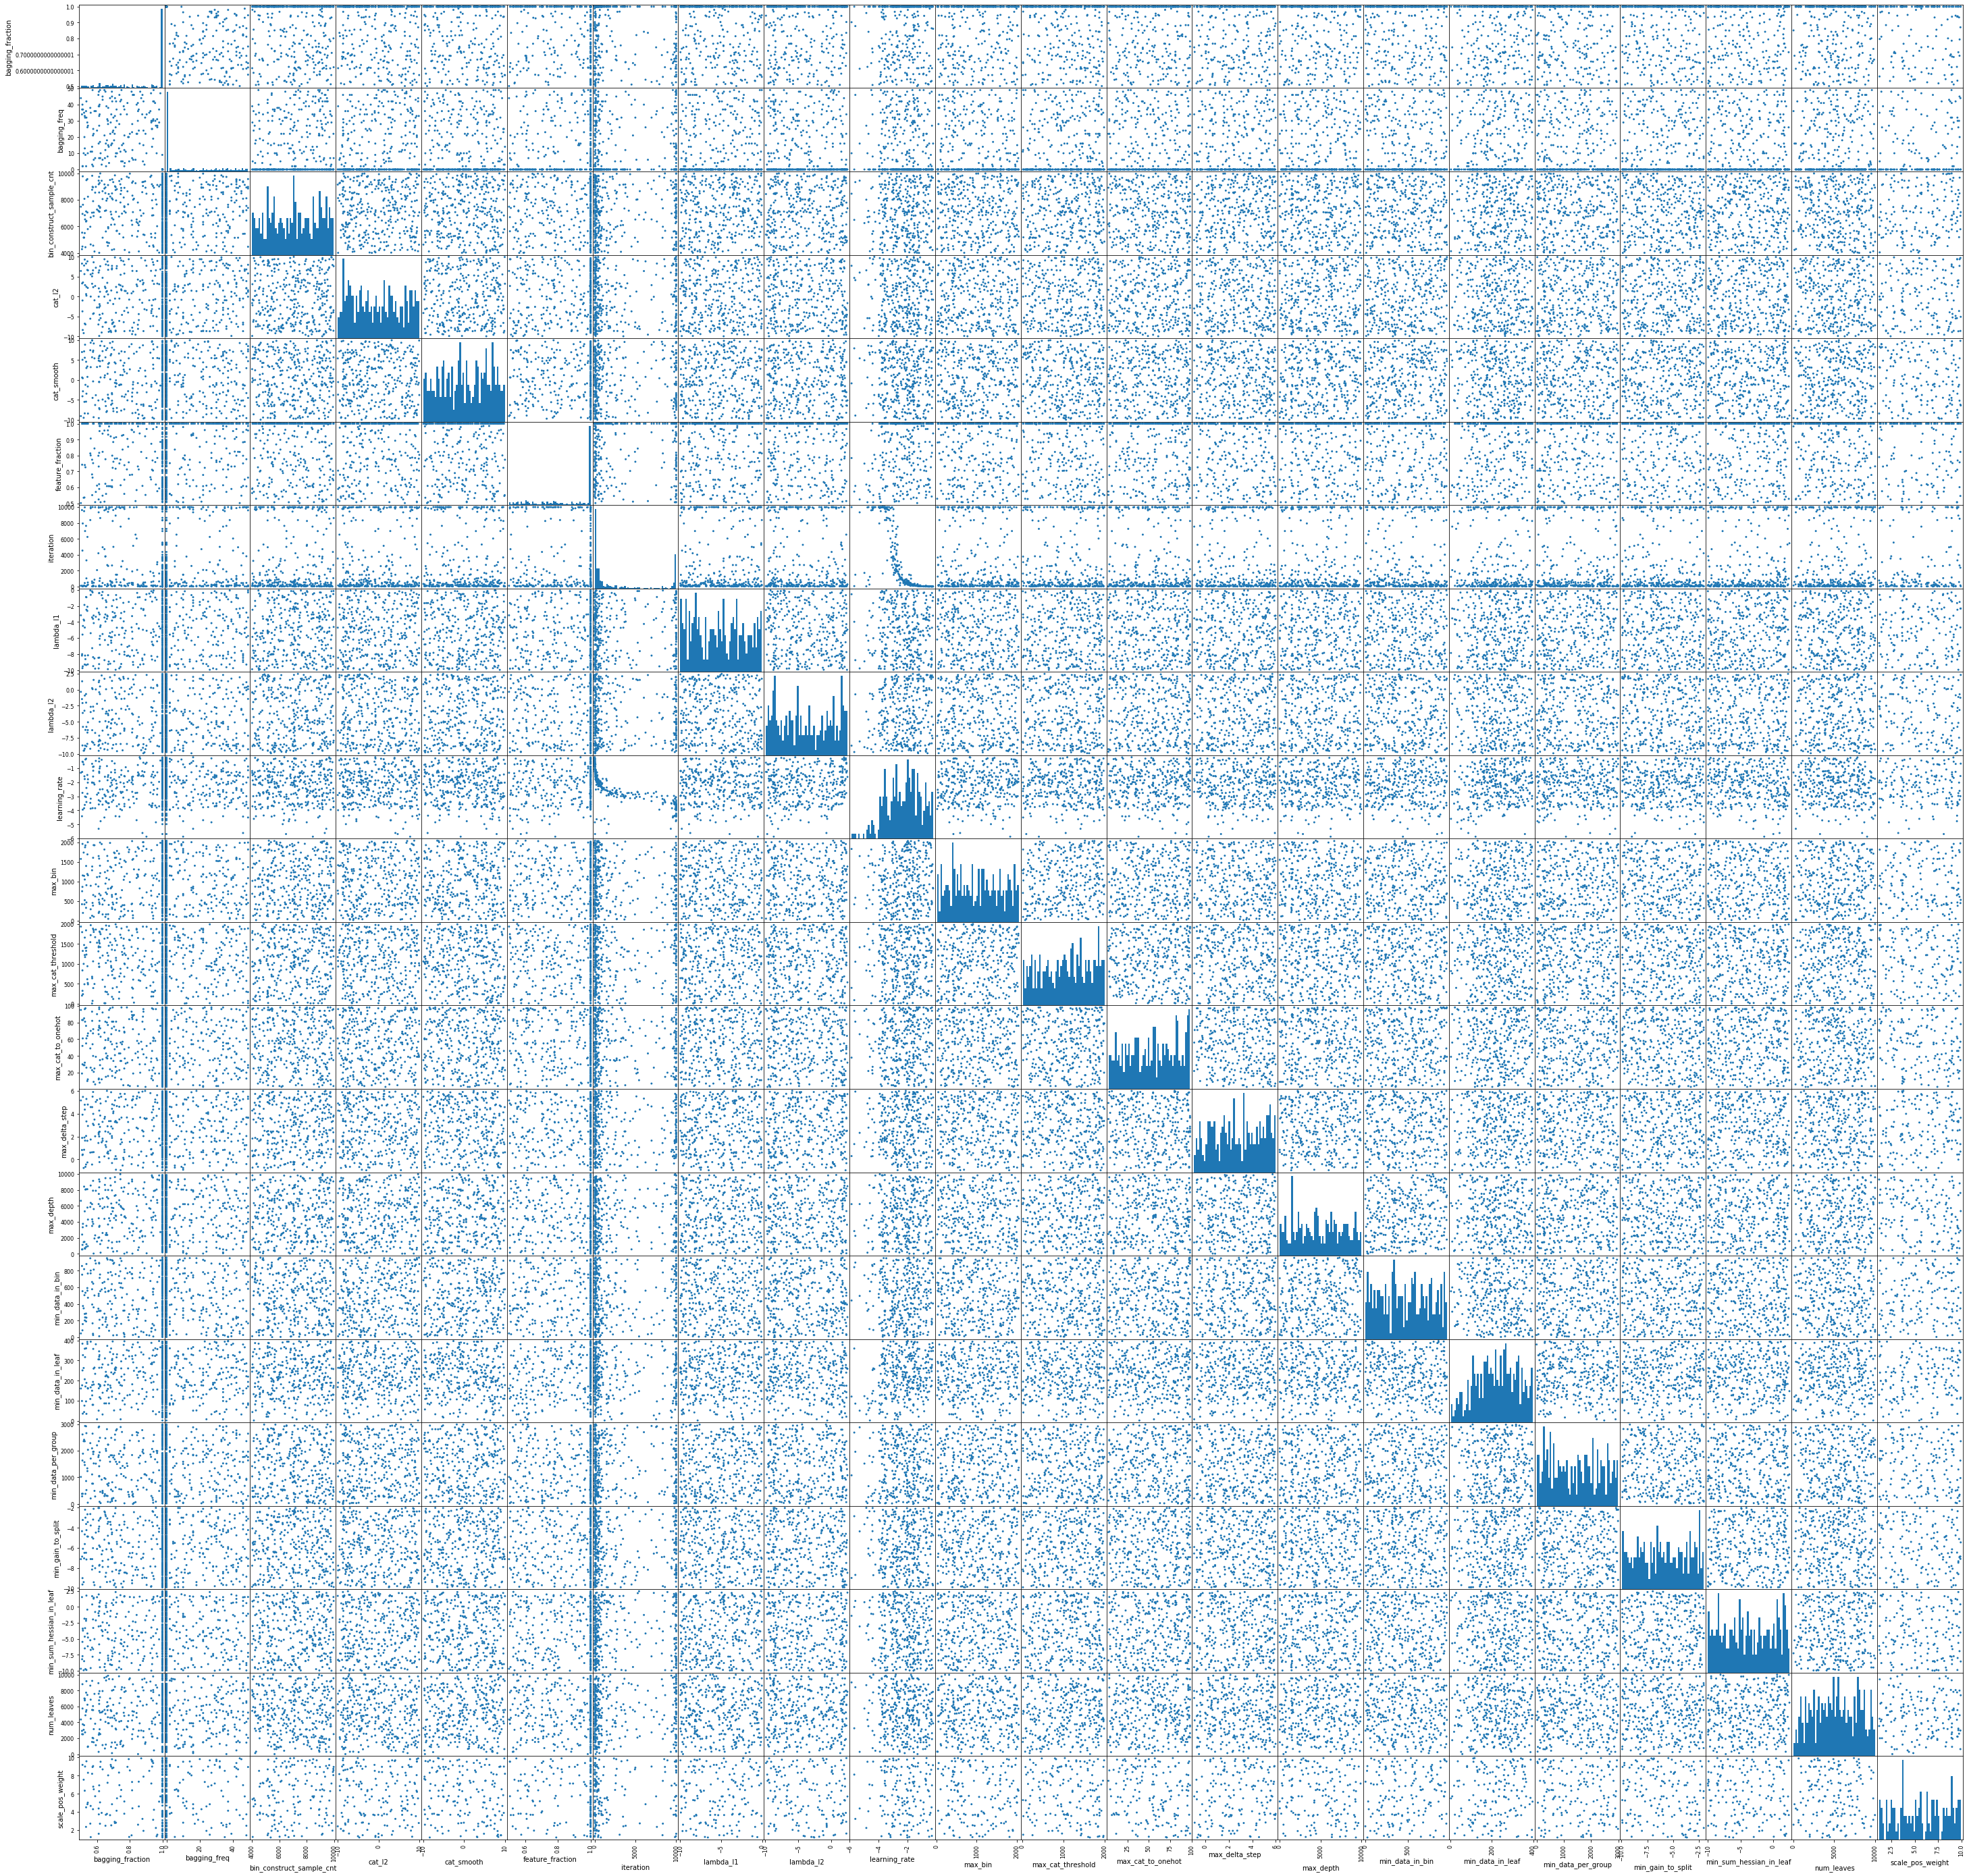

In [21]:
pd.plotting.scatter_matrix(
    pd.concat([best_iteration[CONT_PARAMETERS + INT_PARAMETERS], 
               np.log10(best_iteration[list(set(LOG_PARAMETERS))])],
              axis='columns',
              sort=True
             ).rename(lambda x: x.replace('param_', ''), axis='columns').sort_index(axis=1),
    alpha=1, figsize=(50, 50), hist_kwds={'bins': 50});

### check failures in best selected parameter range

In [26]:
best_range = best\
    [[c for c in best.columns if c.startswith('param_') and not c in SET_PARAMETERS]]\
    .drop(columns=['param_seed', 'param_bagging_enable', 'param_feature_fraction_enable', 'param_num_threads',
                  'param_verbosity'])\
    .quantile([0, 1]).T
best_range

0.0           1.0
param_bagging_fraction          5.010098e-01  1.000000e+00
param_bagging_freq              0.000000e+00  4.900000e+01
param_bin_construct_sample_cnt  4.015000e+03  9.981000e+03
param_cat_l2                    1.027052e-10  9.283722e+09
param_cat_smooth                1.102157e-10  9.604671e+09
param_feature_fraction          5.020401e-01  1.000000e+00
param_lambda_l1                 1.043481e-10  8.732189e-01
param_lambda_l2                 1.241464e-10  2.866641e+02
param_learning_rate             1.341569e-06  6.010469e-01
param_max_bin                   1.900000e+01  2.046000e+03
param_max_cat_threshold         6.000000e+00  1.999000e+03
param_max_cat_to_onehot         3.000000e+00  9.800000e+01
param_max_delta_step            1.118275e-01  9.662580e+05
param_max_depth                 2.800000e+01  9.967000e+03
param_min_data_in_bin           2.000000e+00  9.550000e+02
param_min_data_in_leaf          2.000000e+00  3.970000e+02
param_min_data_per_group        2.000000e+00  2.989000e+03
param_min_gain_to_split         1.170568e-10  9.631120e-03
param_min_sum_hessian_in_leaf   1.010177e-10  2.747693e+02
param_num_leaves                1.200000e+01  9.993000e+03
param_scale_pos_weight          1.189699e+00  9.931698e+00

In [27]:
dfs = []
for f in files:
    df = pd.read_pickle(f).assign(file=f)
    for (n, l, h) in best_range.itertuples():
        df = df[(((df[n] >= l) & (df[n] <= h))
                 | df[n].isna())].copy()
    dfs.append(df)

limited = pd.concat(dfs, ignore_index=True, sort=True)
del dfs
limited.shape

(5860000, 69)

In [28]:
limited_best_iteration = limited.sort_values('min_whole_validation_auc').groupby(['file', 'experiment_id']).last()
del limited
limited_best_iteration.shape

(586, 67)

In [29]:
limited_bad = limited_best_iteration[limited_best_iteration.min_whole_validation_auc < 0.6]

In [30]:
limited_bad.shape

(0, 67)

### top parameters

In [31]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(best_iteration.sort_values('mean_dev_auc', ascending=False).head(2).T)

file                                 ./experiments/overfit-true-10k-3.pkl  \
experiment_id                                                         61    
cnt                                                                     3   
iteration                                                             173   
max_dev_auc                                                      0.858617   
max_dev_binary_logloss                                           0.527077   
max_overfit_auc                                                 0.0215862   
max_overfit_binary_logloss                                       0.015494   
max_validation_auc                                               0.811748   
max_validation_binary_logloss                                    0.545001   
max_whole_train_auc                                              0.844389   
max_whole_train_binary_logloss                                   0.499021   
max_whole_validation_auc                                          0.80861   